# Pré-processamento de Dados para Mineração: Uma Abordagem Prática com a Base de dados "Wine Quality"

- Aluno : Anderson Almeida da Silveira
- Matrícula : 2020002169

# Introdução

## Pré processamento
O pré-processamento de dados é uma etapa crucial na mineração de dados, desempenhando um papel fundamental na garantia da qualidade e relevância dos resultados obtidos nas fases posteriores de mineração. Esta fase envolve uma série de técnicas e procedimentos projetados para limpar, transformar e preparar os dados brutos para análise.

Essa etapa se faz necessária pois os dados do mundo real normalmente estão sujos com valores incompletos, discrepantes ou inconsistentes. Os motivos para isso são vários e podem ser devidos a indisponibilidade no momento da coleta, falha humana ou de equipamento, falha na transmissão ou fontes conflitantes.

Essa etapa consiste em basicamnete 4 passos.

- Limpeza que envolve remover inconsistências, casos extremos (outliers) e tratar os casos em branco seja removendo ou preenchendo com algum valor.
- Integração onde caso tenhamos mais de uma fonte de dados elas são unidas para formar uam base única
- Transformação onde os dados podem ser modificados para remoçao de ruídos, mudança de tipo para uma mais adequado ou normalização.
- Redução em que os dados tem seu volume reduzido sem perder sua representatividade original.
<br><br>

## Sobre a base escolhida
Neste trabalho iremos aplicar algumas dessas técnicas à base de dados "Wine Quality Datasets" fornecida pela Vinho Verde cujo propósito era ser uma base de domínio público para uso em estudos sobre qualidade de vinhos. Devido a questões legais apenas informações químicas do produto final e informações sensoriais são fornecidas e dados como marca e preço não foram fornecidos.

Esta base de dados foi usado por [Cortez et al., 2009] para demonstrar o uso de técnicas de mineração de dados para o uso na indústria de vinhos como uma ferramenta objetiva na avaliação e melhora da qualidade de novos vinhos.

Posteriormente a base de dados foi integrada ao [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/) e usada em diversos trabalhos tanto de estudo quanto para aprendizagem. Tal repositório é facilmente integrado em outras aplicações através do pacote [ucimlrepo](https://github.com/uci-ml-repo/ucimlrepo).
<br><br>

## Sobre as variáveis
As variáves presentes na base de dados são as seguintes:
- fixed acidity : Quantidade de ácidos totais
- volatile acidity : Quantidade de ácido acético
- citric acid : Quantidade de ácido cítrico
- residual sugar : Quantidade de açúcar presente após o fim da fermentação
- chlorides : Quantidade de sais presentes
- free sulfur dioxide : Quantidade de dioxido de enxofre na forma livre para fácil reação química
- total sulfur dioxide: Quantidade de dioxido de enxofre em todas as formas
- density: Densidade da bebida
- PH: Valor referente à quão ácida ou básica é uma substância
- Alcohol: Teor alcólico da bebida
- Quality: Classificação de qualidade sensorial da bebida
- Color: Classificação entre vinho tinto (red) ou vinho branco (white)

A variável Color se trata de uma variável categórica textual enquanto Quality é uma variável categórica numérica e se trata da variável dependente a ser analisada. Todas as outras variáveis são contínuas categóricas e formam o conjunto das variáveis independentes desta base de dados.

# Metodologia

Toda programação será feita usando a linguagme Python.
Será utilizado o pacote [ucimlrepo](https://github.com/uci-ml-repo/ucimlrepo) para importação da base de dados. Para manipulação da mesma serão usadas as bibliotecas Pandas, Numpy, Seabor, Matplotlib e scikit-learn.

Iremos realizar os 4 passos do pre processamento descritos na introdução deste documento: limpeza, integração, transformação e redução

# Desenvolvimento
A seguir será feito o carregamento e pre proceesamento dos dados

## Importando e instalando as bibliotecas necessárias

In [108]:
!pip install -U ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Carregando os dados

Vamos carregars os dados e exibir algumas informações básicas

In [109]:
wine_quality = fetch_ucirepo(id=186)
print(wine_quality)

{'data': {'ids': None, 'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.

## Estatísticas básicas

Notamos que a base de dados esta divididos em 3 frames. Features que compoem as variáveis independentes. Targets com a variável dependente quality. Original que combina dos dois frames anteriores adicionada a informação do tipo de vinho ser tinto ou branco.

In [111]:
features = wine_quality.data.features
features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [112]:
targets = wine_quality.data.targets
targets.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [113]:
original = wine_quality.data.original
original.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [114]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [115]:
features.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [116]:
original.describe(include='object')

,color
count,6497
unique,2
top,white
freq,4898


In [117]:
targets['quality'].astype('category').describe()

count     6497
unique       7
top          6
freq      2836
Name: quality, dtype: int64

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


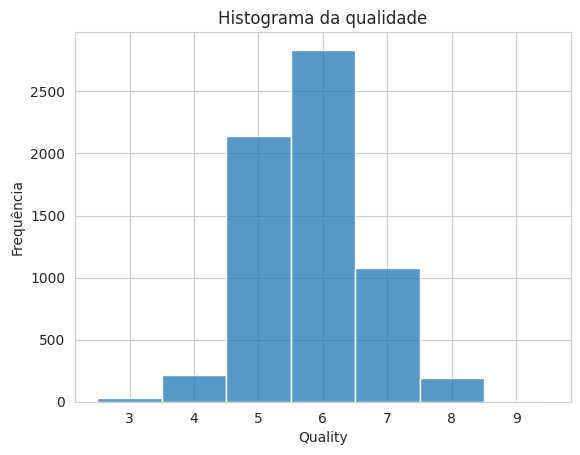

In [118]:
# Mostrando a contagem de frequencia da qualidade
sns.set_style("whitegrid")

print(targets['quality'].value_counts())

sns.histplot(data=targets, x='quality', discrete=True)
plt.xlabel('Quality')
plt.ylabel('Frequência')
plt.title('Histograma da qualidade')
plt.show()

## Análise inicial

- Notamos que não existem valores nulos.
<br><br>
- Duas variáveis possuem valores de desvio padrão muito acima das outras free_sulfur_dioxide e total_sulfur_dioxide. O dióxido de enxofre é usado como conservante em vinhos e alguns fabricantes optam por não usa-lo. Na Europa para valores abaixo de 10 ppm não precisam informa-lo sua presença e seu valor máximo permitido é de 440 ppm. Os valores mínimos e máximso encontrados na base de dados são coerentes com essa informação o que sugere não se tratar de um erro de medida.
<br><br>
- Para a variável quality apesar de ser numérica usamos a função describe como tipo categoria. Através do histograma notamos que a maiora das amostras estão no grupo intermediários e vinhos de baixa e alta qualidade estão menos presentes. Para as categorias 3 e 9 que são as mais extremas o número de amostras é baixíssimo comparados as outras.

## Análise de outliers

In [119]:
features_columns = features.columns

# Defina um limite para identificar outliers (por exemplo, 3 desvios padrão)
outlier_threshold = 3

# Função para identificar outliers em uma coluna
def identify_outliers(column):
    mean = column.mean()
    std = column.std()
    lower_limit = mean - outlier_threshold * std
    upper_limit = mean + outlier_threshold * std
    outliers = (column < lower_limit) | (column > upper_limit)
    return outliers

# Identifique e analise outliers em cada coluna numérica
for column_name in features_columns:
    column = features[column_name]
    outliers = identify_outliers(column)

    # Exiba o resultado da análise da coluna
    print(f"Análise da coluna '{column_name}':")
    print(f" - Número total de outliers: {outliers.sum()}")
    print(f" - Valor médio: {column.mean()}")
    print(f" - Desvio padrão: {column.std()}")
    print(f" - Limite inferior para outliers: {column.mean() - outlier_threshold * column.std()}")
    print(f" - Limite superior para outliers: {column.mean() + outlier_threshold * column.std()}")
    print("\n")

Análise da coluna 'fixed_acidity':
 - Número total de outliers: 128
 - Valor médio: 7.215307064799139
 - Desvio padrão: 1.2964337577998153
 - Limite inferior para outliers: 3.3260057913996928
 - Limite superior para outliers: 11.104608338198585


Análise da coluna 'volatile_acidity':
 - Número total de outliers: 95
 - Valor médio: 0.3396659996921656
 - Desvio padrão: 0.16463647408467877
 - Limite inferior para outliers: -0.15424342256187074
 - Limite superior para outliers: 0.8335754219462019


Análise da coluna 'citric_acid':
 - Número total de outliers: 28
 - Valor médio: 0.3186332153301524
 - Desvio padrão: 0.14531786489759155
 - Limite inferior para outliers: -0.11732037936262224
 - Limite superior para outliers: 0.7545868100229269


Análise da coluna 'residual_sugar':
 - Número total de outliers: 26
 - Valor médio: 5.443235339387409
 - Desvio padrão: 4.757803743147418
 - Limite inferior para outliers: -8.830175890054846
 - Limite superior para outliers: 19.716646568829663


Anális

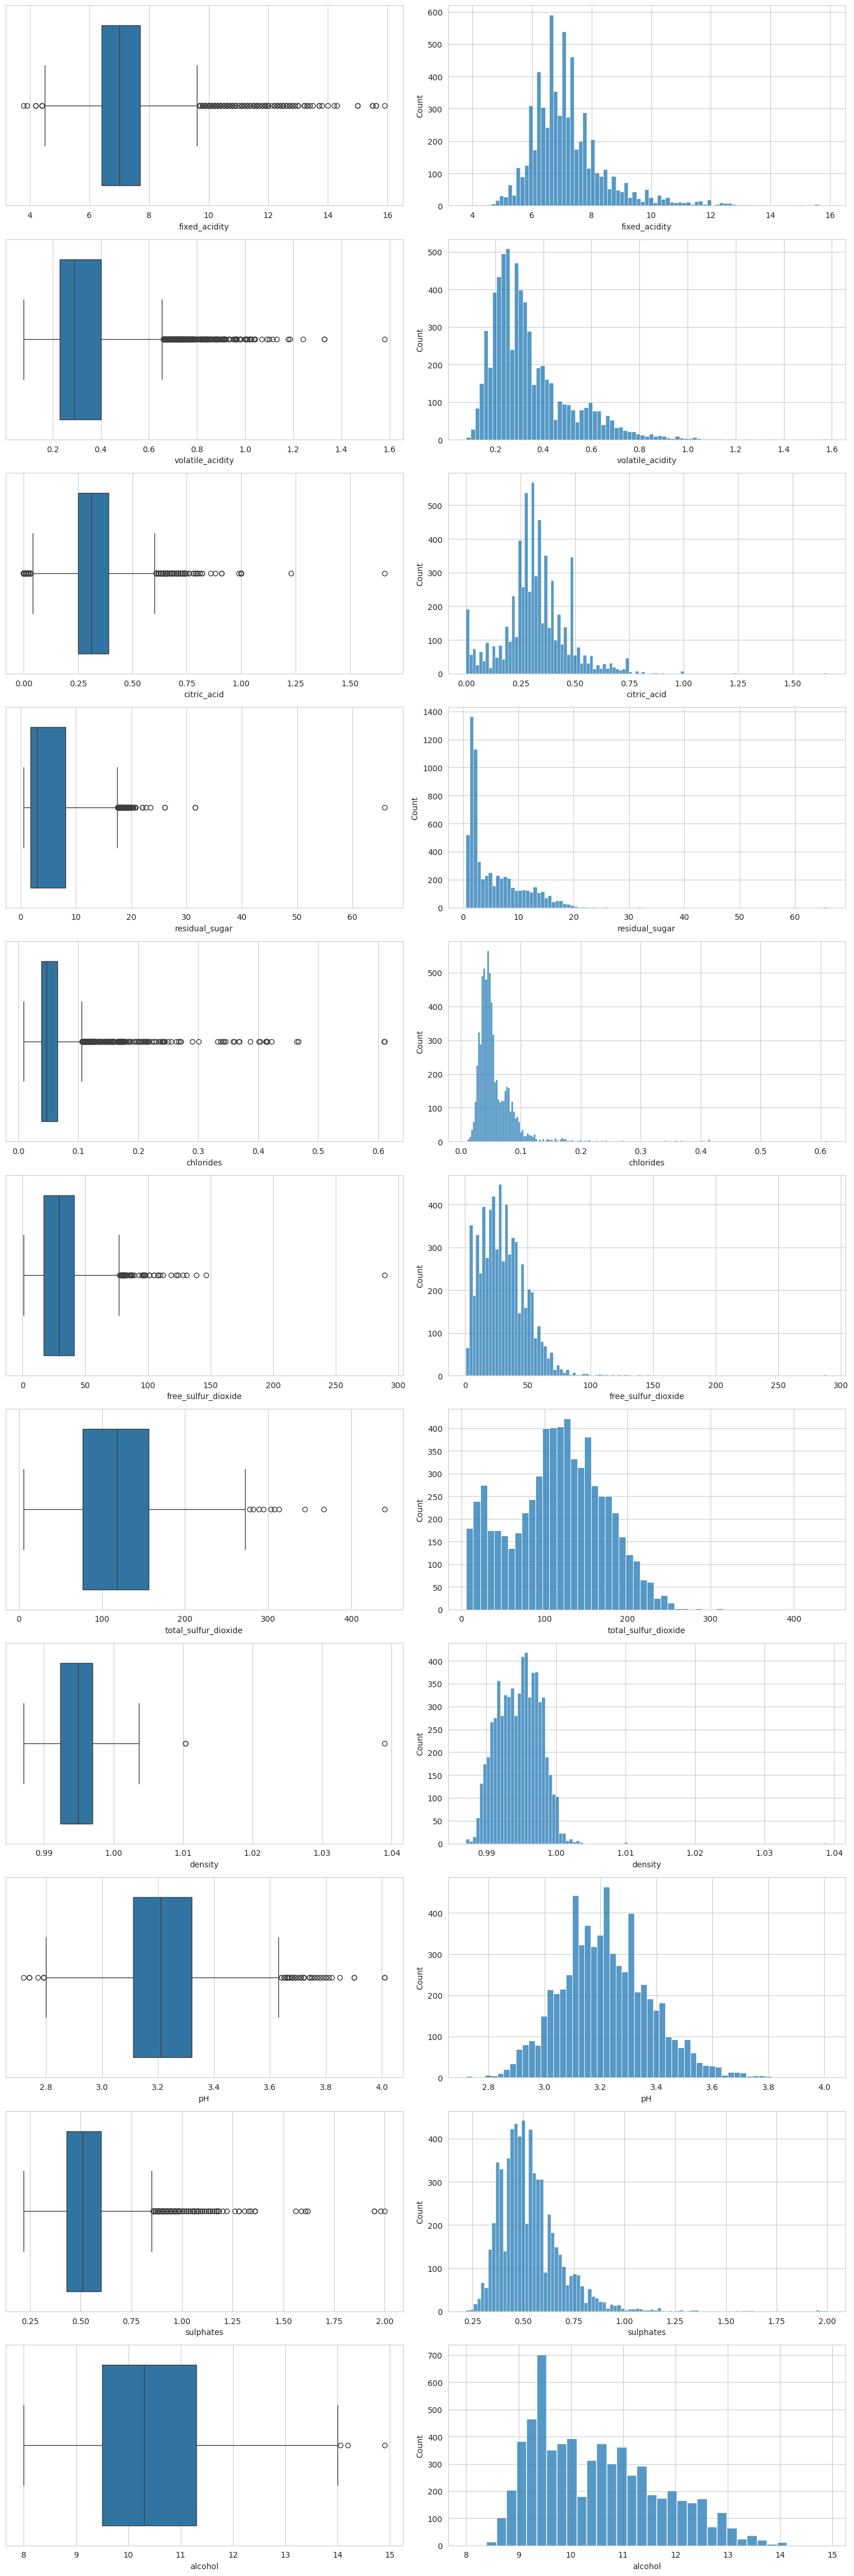

In [120]:
size = features.columns.size

fig, ax = plt.subplots(size, 2, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)

# Itera sobre as colunas
for i, column_name in enumerate(features_columns):
    # Cria um boxplot para cada coluna
    sns.boxplot(x=column_name, data=features, ax=ax[i, 0])
    # Cria um histograma para cada coluna
    sns.histplot(x=column_name, data=features, ax=ax[i, 1])

# Ajusta o layout
plt.tight_layout()

plt.show()

- Notamos que a distribuição das variáveis independentes possui o formato de uma distribuição normal contudo esta deslocada para a esquerda. A presença de outliers em grande maioria para um lado do boxplot também indica uma assimetria dos dados.
- Uma possível causa disso seriam as poucas amostras refente a quality com valores 3, 4, 8 e 9
- Iremos remove-las e observar se elas são as causadoras dessa tendência

In [121]:
data = original.drop(columns=['color'])
data = data[(data['quality'] != 3) & (data['quality'] != 9) & (data['quality'] != 4) & (data['quality'] != 8)]
data = data.drop(columns=['quality'])

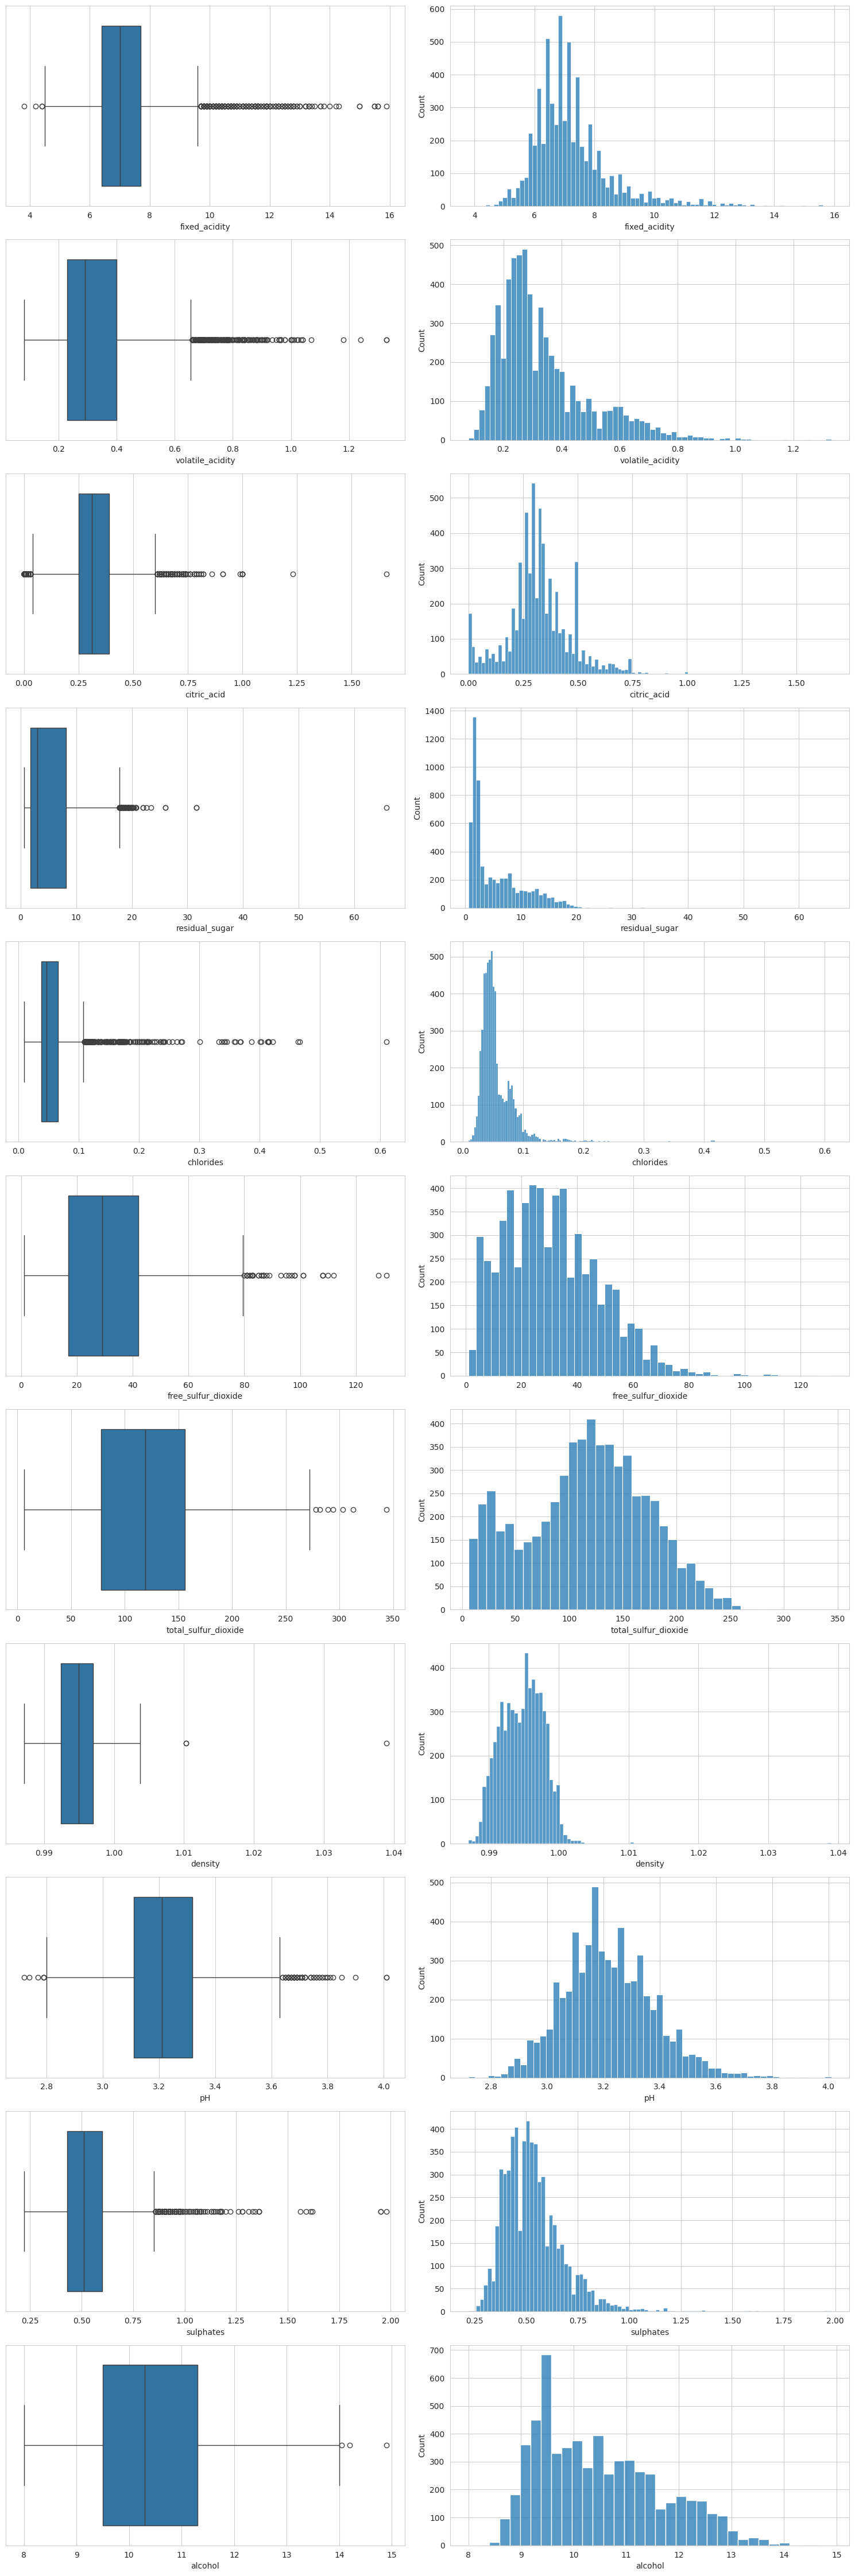

In [122]:
data_columns = data.columns

data_size = data.columns.size

fig, ax = plt.subplots(data_size, 2, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)

# Itera sobre as colunas
for i, column_name in enumerate(data_columns):
    # Cria um boxplot para cada coluna
    sns.boxplot(x=column_name, data=data, ax=ax[i, 0])
    # Cria um histograma para cada coluna
    sns.histplot(x=column_name, data=data, ax=ax[i, 1])

# Ajusta o layout
plt.tight_layout()

plt.show()

- Observamos que a tendência da distribuição se deslocar a esquerda se manteve o que sugere que não é uma instabilidade estatística dos valores mais altos e baixos de quality e sim uma tendência natural da amostra.

## Correlaçao de variáveis

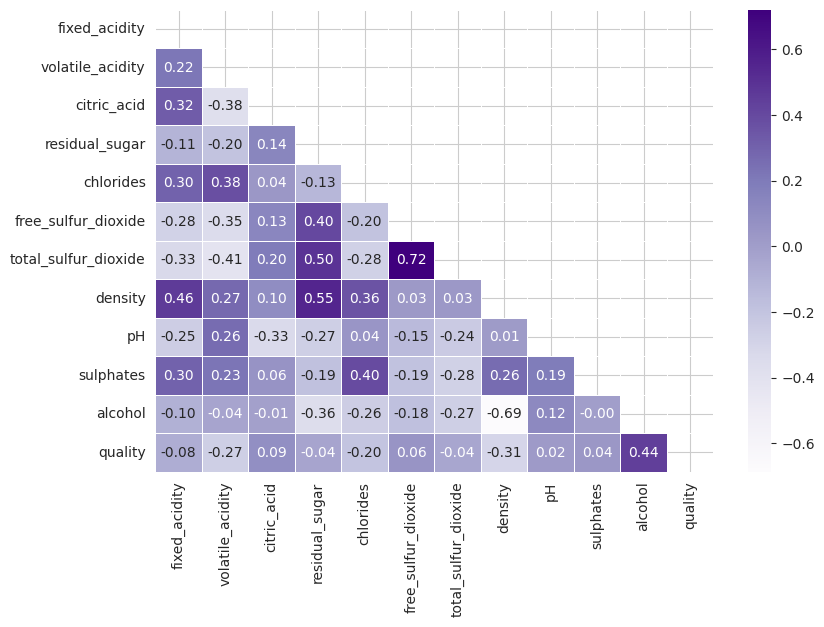

In [123]:
data = original.drop('color',axis=1)
corr = data.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

- Notamos que a variável com correlação mais forte com quanlity se trata do teor alcóolico mas mesmo ela não possui um valor próximo de 1 para indicar uma relação linear entre elas.

# Limpeza de dados

Dado a ausência de dados em branco, poucas amostras da variável independente nos casos extremos e uma tendência de distribuição parecida nas variáveis independentes optamos por não remover nenhuma amostra.

A coluna color não será usada na análise.

# Integração

Foram fornecidos dados de vinhos tinto e branco e ambos já foram combinados na mesma base de dados. Portanto não foi nescessário nenhuma mudança a mais nos mesmos.

# Transformação

Visto que os valores das features possuem ordens de grandezas diferentes uns dos outros iremos realizar a normalização dos dados.

In [124]:
data = original.drop(['color', 'quality'], axis=1)

scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(data)

data = pd.DataFrame(scaler, columns=data.columns)

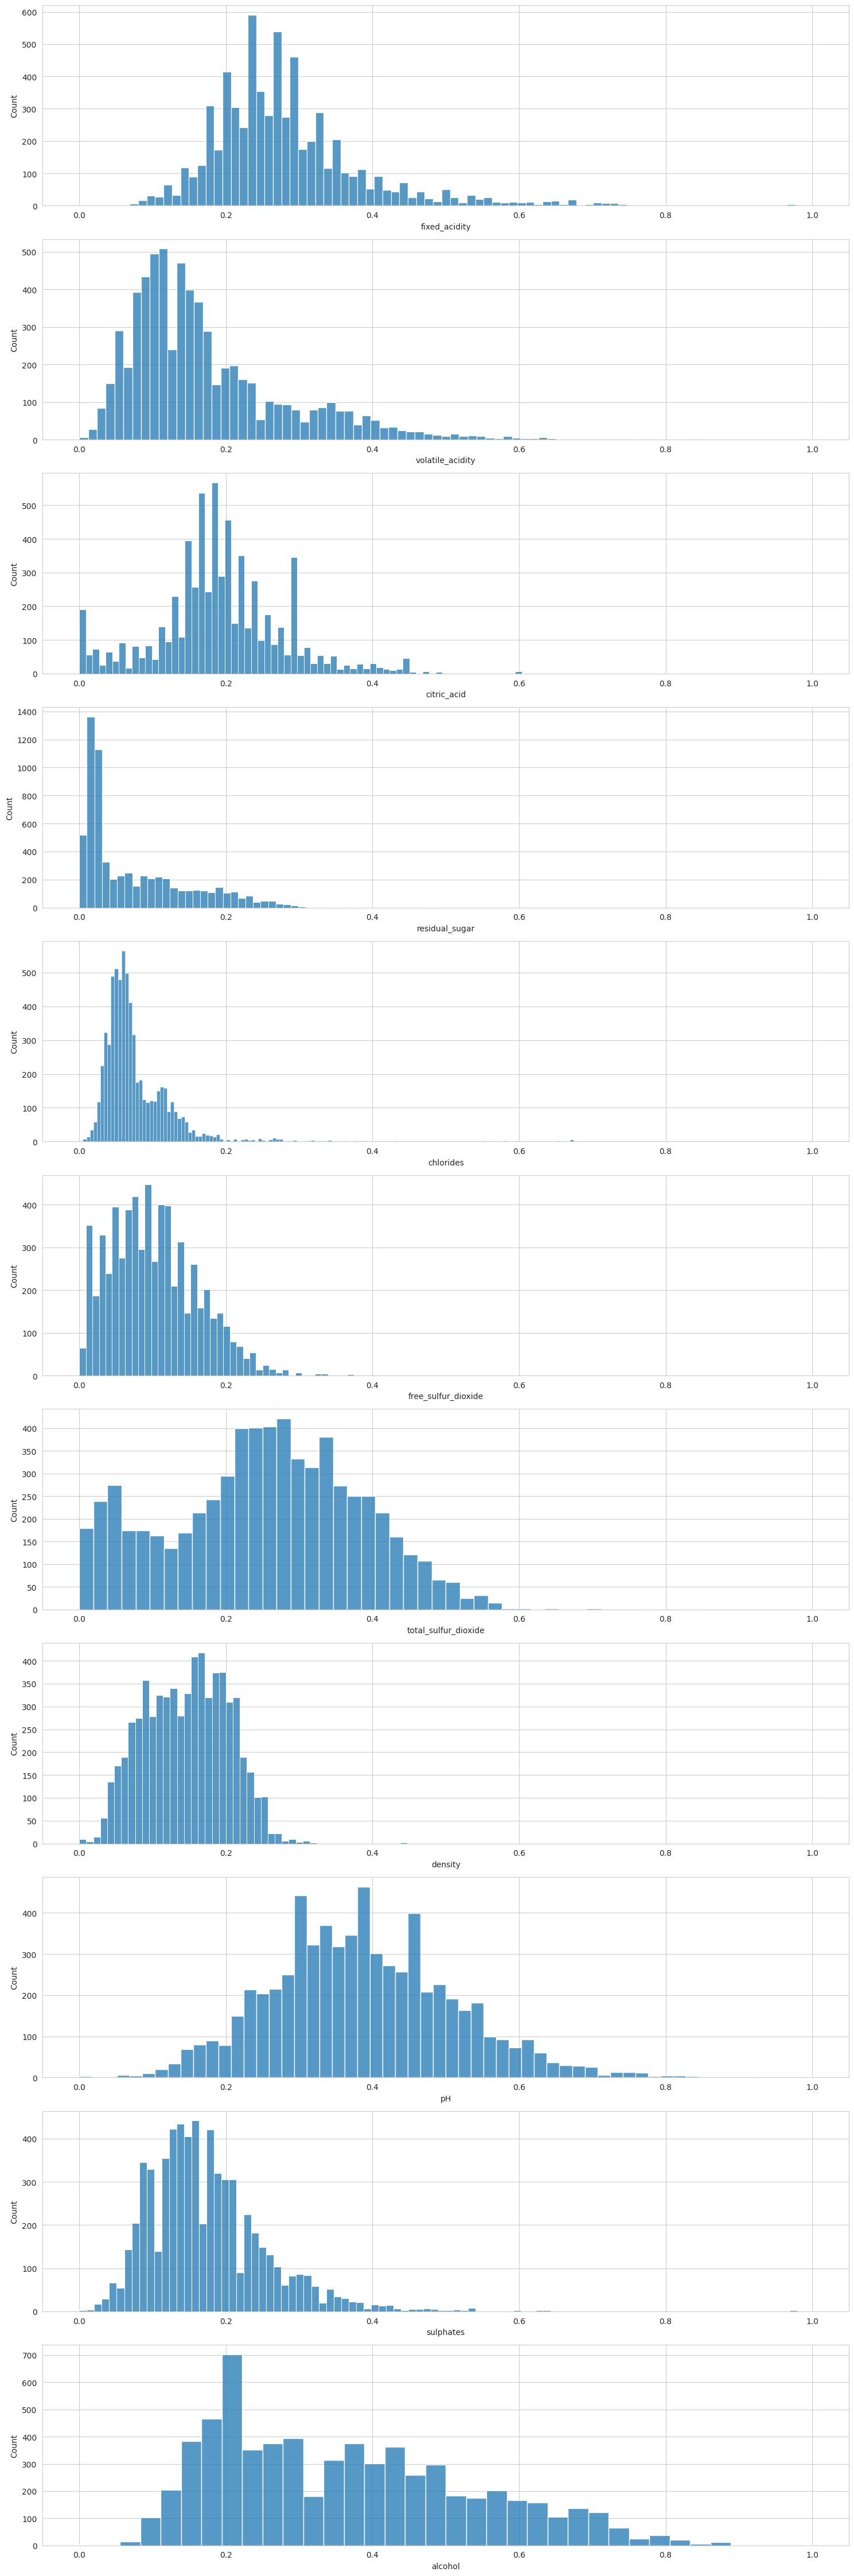

In [125]:
data_columns = data.columns

data_size = X.columns.size

fig, ax = plt.subplots(data_size, figsize=(15, 45))
plt.subplots_adjust(hspace=0.5)

# Itera sobre as colunas
for i, column_name in enumerate(data_columns):
    # Cria um histograma para cada coluna
    sns.histplot(x=column_name, data=data, ax=ax[i])

# Ajusta o layout
plt.tight_layout()

plt.show()

In [126]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899


- Notamos que a distribuição se manteve parecida com a original sem sofrer grandes distorções e agora temos valores normalizados

## Redução

- Dado que algumas categorias em quality apresentam muitos poucos valores iremos realizar uma técnica de redução dahamda discretização. Os valores 3 e 4 serão trocados por bad, os valores 8 e 9 por good e os outros valores por average

In [127]:
data['quality'] = original['quality'].replace({
    9: 'Good',
    8: 'Good',
    7: 'Average',
    6: 'Average',
    5: 'Average',
    4: 'Bad',
    3: 'Bad'
})

In [128]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,Average
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,Average
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,Average
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,Average
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,Average


# Resultados e discussão

Após o pré-processamento dos dados, observamos que a base de dados estava relativamente limpa, embora apresentasse alguns problemas de distribuição. Normalizamos os dados e conseguimos manter uma distribuição sem alterações em relação à base original. Além disso, realizamos uma redução por discretização na variável independente para mitigar possíveis viés nos resultados ou instabilidade na análise futura.

Embora não tenhamos reduzido o número total de amostras, a redução na variável 'quality' pode ser suficiente para aprimorar o desempenho das análises de dados no futuro.

# Conclusão

Exploramos o processo de carregamento, visualização e pré-processamento de dados, aplicando diversas técnicas durante esse procedimento. Durante a aplicação dessas técnicas, realizamos remoções e modificações em alguns dados, porém há diversas outras transformações possíveis que poderiam ser aplicadas.

Para trabalhos futuros, planejamos comparar o desempenho de técnicas de mineração de dados entre a base de dados original e a base modificada. Além disso, consideramos abordagens alternativas para lidar com o problema das poucas amostras extremas na variável 'quality', como a estratificação de dados ou o uso de amostragens aleatórias. A escolha da abordagem mais adequada nem sempre é trivial, mas planejamos explorar as técnicas de mineração de dados para determinar se os dados foram tratados de maneira apropriada.

# Referências

Cortez, P. et al. “Modeling wine preferences by data mining from physicochemical properties.” Decis. Support Syst. 47 (2009): 547-553.

Sulfitos no vinho [Link](https://www.divinho.com.br/blog/sulfitos-no-vinho/#:~:text=O%20que%20s%C3%A3o%20Sulfitos%3F,degradem%20de%20forma%20mais%20r%C3%A1pida.)

https://github.com/uci-ml-repo/ucimlrepo

https://github.com/thalesvalente/teaching/tree/main/data-mining-applied-to-engineering/